In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')
import stablerank.srank as sr

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

font = {'size'   : 40}
matplotlib.rc('font', **font)

## Train test split + SVM

In [2]:
path1 = "train_dataset_filtered.csv"
data_train = pd.read_csv(path1)

path2 = "test_dataset_filtered.csv"
data_test = pd.read_csv(path2)

'red_patch = mpatches.Patch(color=\'red\', linewidth=1, label=\'Non-grooming\')\nblue_patch = mpatches.Patch(color=\'blue\', linewidth=1, label=\'Grooming\')\n\nlightr_patch = mpatches.Patch(color=\'mistyrose\', linewidth=1, label=\'Non-grooming Mean\')\nlightb_patch = mpatches.Patch(color=\'cyan\', linewidth=1, label=\'Grooming Mean\')\nplt.rcParams["legend.fontsize"] = 40\n\npos0 = [i for i, x in enumerate(y_train) if x == 0]\npos1 = [i for i, x in enumerate(y_train) if x == 1]\n\npcf0 = []\npcf1 = []\npcfmean0 = 0\npcfmean1 = 0\nfor i in pos1:\n    pcf1.append(pcf_full[i])\n    pcfmean1 += pcf_full[i]*(1/len(pos1))\n\nfor i in pos0:\n    pcf0.append(pcf_full[i])\n    pcfmean0 += pcf_full[i]*(1/len(pos0))\n\npcfmean0.plot(color=\'cyan\',line_width=5)\npcfmean1.plot(color=\'mistyrose\',line_width=5)\n\nplt.legend(handles=[red_patch, blue_patch, lightr_patch, lightb_patch])\nplt.xlabel(\'Filtration Level\')\nplt.ylabel(\'H0\')'

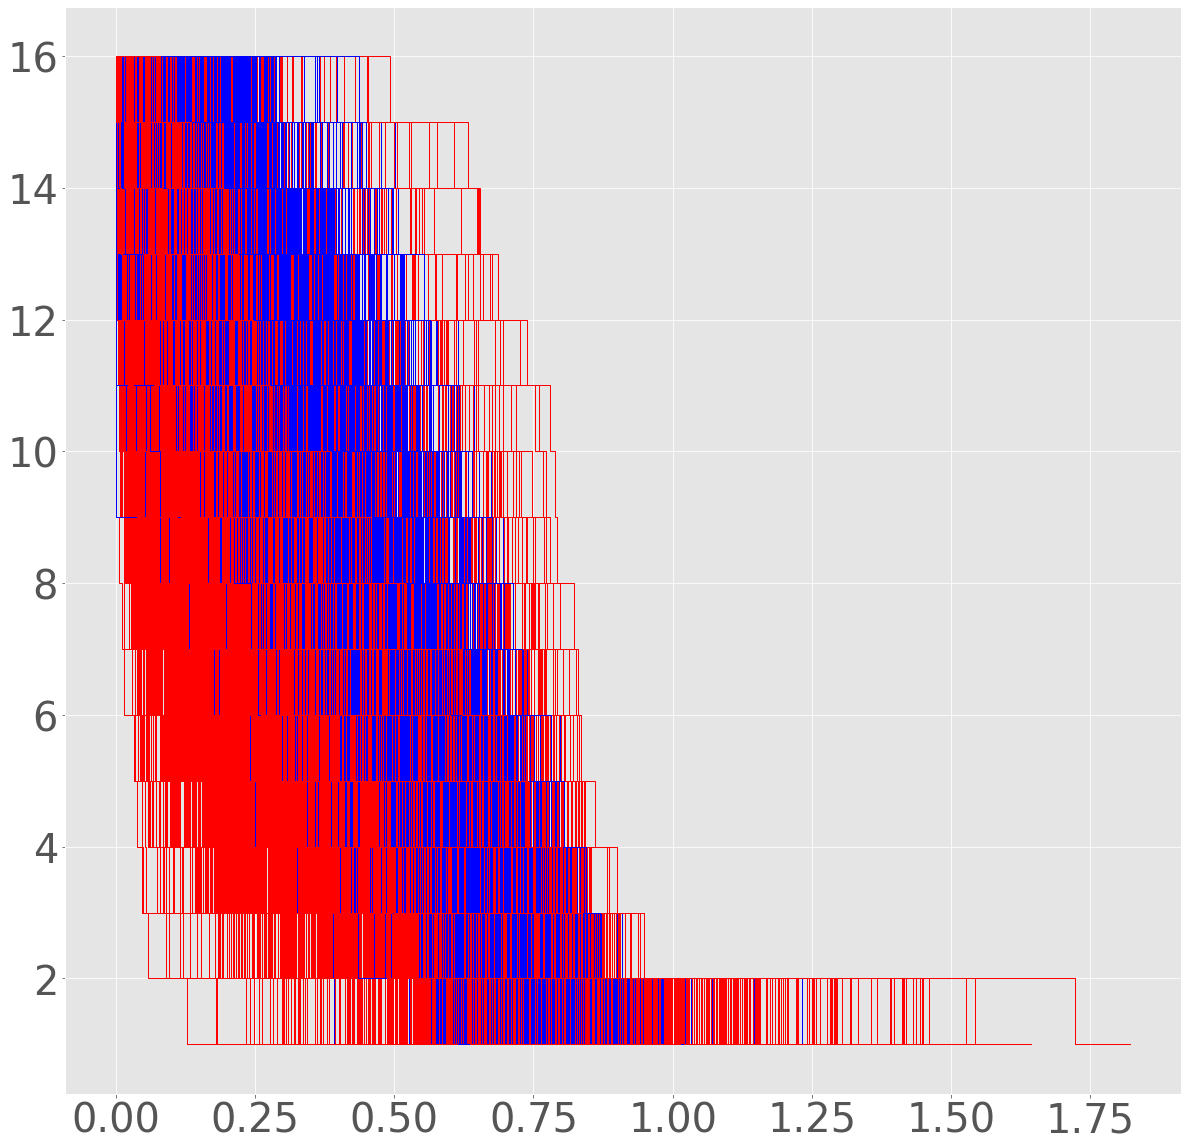

In [3]:
# specifying metric
metric = "correlation"
metric_parameter = 2

# specifying clustering method
clustering_method = "single"
cloudsize = 16    #(x,y,likelihood)*8
dimsize = 100
pcf_full = []
y_train = []

plt.figure(figsize=(20,20))


for e in range(len(data_train)):
    pos = dimsize*e
    if len(data_train) - pos <  dimsize:
        break
    
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_train.iloc[pos:pos+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_train[data_train.columns[i+offset]][pos+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    try:
        f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
        pcf_full.append(f_pcf.content)
        #pcf_full.append(f_pcf)
        #test
        if n_groom>dimsize/2:
            f_pcf.plot(color='blue', label='grooming')
            y_train.append(0)
        else:
            f_pcf.plot(color='red', label='non-grooming')
            y_train.append(1)
    except:
        print("0 coordinates in trajectory")
    
    
        
    # add overlap
    pos2 = pos + int(dimsize/2)
    if len(data_train) - pos2 <  dimsize:
        break
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_train.iloc[pos2:pos2+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_train[data_train.columns[i+offset]][pos2+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    try:
        f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
        pcf_full.append(f_pcf.content)
        #pcf_full.append(f_pcf)
        #test
        if n_groom>dimsize/2:
            f_pcf.plot(color='blue', label='grooming')
            y_train.append(0)
        else:
            f_pcf.plot(color='red', label='non-grooming')
            y_train.append(1)
    except:
        print("0 coordinates in trajectory")

'''red_patch = mpatches.Patch(color='red', linewidth=1, label='Non-grooming')
blue_patch = mpatches.Patch(color='blue', linewidth=1, label='Grooming')

lightr_patch = mpatches.Patch(color='mistyrose', linewidth=1, label='Non-grooming Mean')
lightb_patch = mpatches.Patch(color='cyan', linewidth=1, label='Grooming Mean')
plt.rcParams["legend.fontsize"] = 40

pos0 = [i for i, x in enumerate(y_train) if x == 0]
pos1 = [i for i, x in enumerate(y_train) if x == 1]

pcf0 = []
pcf1 = []
pcfmean0 = 0
pcfmean1 = 0
for i in pos1:
    pcf1.append(pcf_full[i])
    pcfmean1 += pcf_full[i]*(1/len(pos1))

for i in pos0:
    pcf0.append(pcf_full[i])
    pcfmean0 += pcf_full[i]*(1/len(pos0))

pcfmean0.plot(color='cyan',line_width=5)
pcfmean1.plot(color='mistyrose',line_width=5)

plt.legend(handles=[red_patch, blue_patch, lightr_patch, lightb_patch])
plt.xlabel('Filtration Level')
plt.ylabel('H0')'''

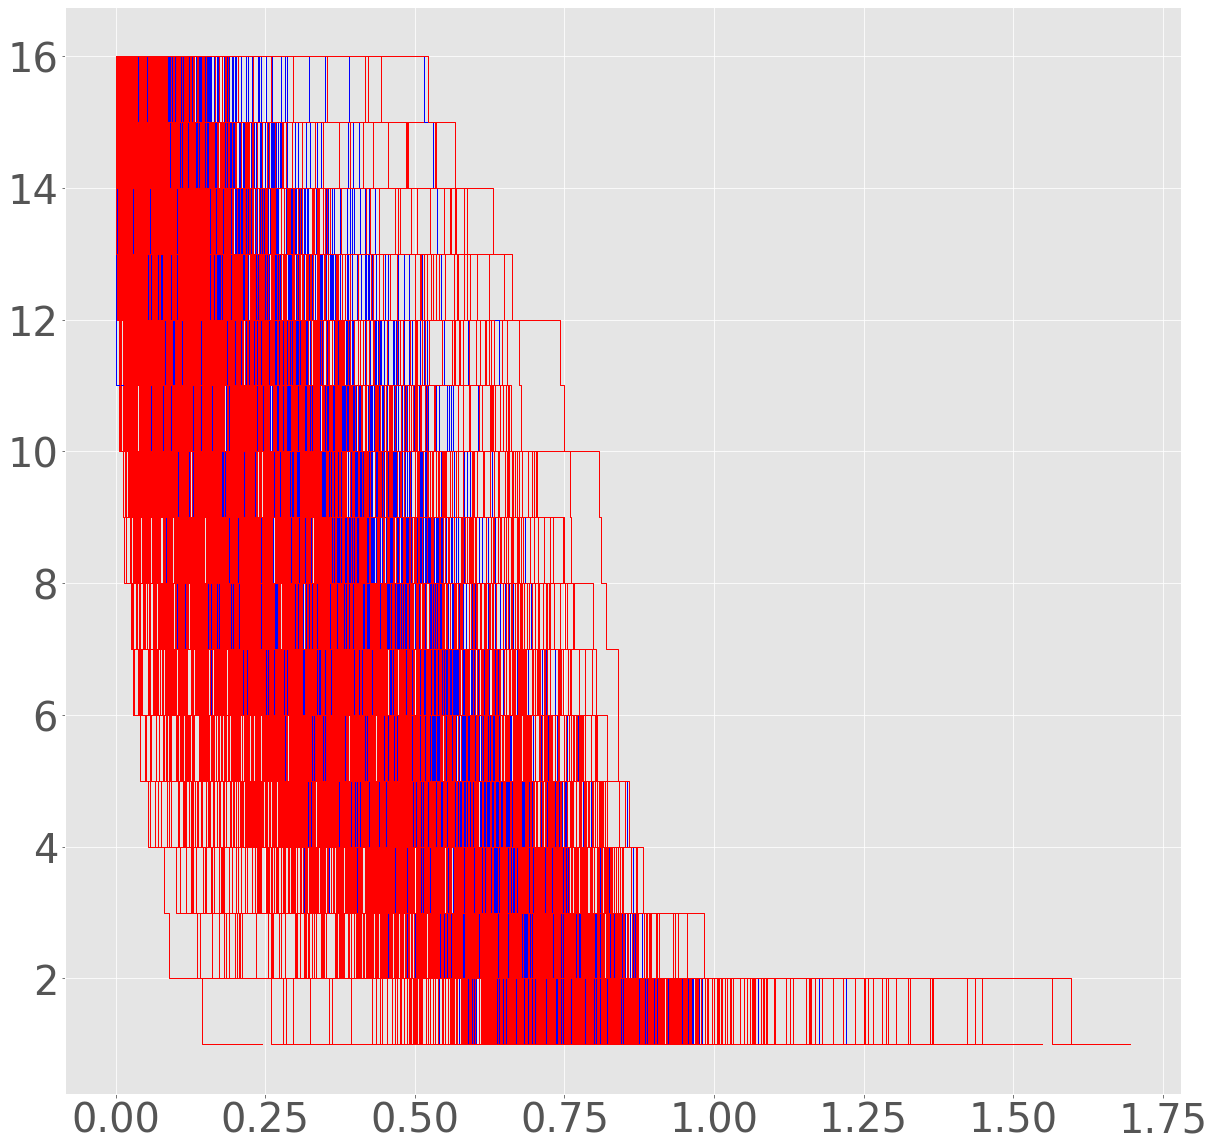

In [4]:
# specifying metric
metric = "correlation"
metric_parameter = 2

# specifying clustering method
clustering_method = "single"
cloudsize = 16    #(x,y,likelihood)*8
dimsize = 100
pcf_full_test = []
y_test = []

plt.figure(figsize=(20,20))


for e in range(len(data_test)):
    pos = dimsize*e
    if len(data_test) - pos <  dimsize:
        break
    
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_test.iloc[pos:pos+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_test[data_test.columns[i+offset]][pos+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    #try:
    f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
    pcf_full_test.append(f_pcf.content)
    #test
    if n_groom>dimsize/2:
        f_pcf.plot(color='blue')
        y_test.append(0)
    else:
        f_pcf.plot(color='red')
        y_test.append(1)
    #except:
    #    print("0 coordinates in trajectory")
    
    
        
    # add overlap
    pos2 = pos + int(dimsize/2)
    if len(data_test) - pos2 <  dimsize:
        break
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_test.iloc[pos2:pos2+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_test[data_test.columns[i+offset]][pos2+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    try:
        f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
        pcf_full_test.append(f_pcf.content)
        #test
        if n_groom>dimsize/2:
            f_pcf.plot(color='blue')
            y_test.append(0)
        else:
            f_pcf.plot(color='red')
            y_test.append(1)
    except:
        print("0 coordinates in trajectory")


## test data from same angle

In [5]:
path4 = "trajectories_22min_right_w_behaviors_filtered.csv"
data_test3 = pd.read_csv(path4)
data_test3

,frame_id,x_Nose_,y_Nose_,likelihood_Nose_,x_Left_Ear_,y_Left_Ear_,likelihood_Left_Ear_,x_Right_Ear_,y_Right_Ear_,likelihood_Right_Ear_,...,x_Tail_Top_,y_Tail_Top_,likelihood_Tail_Top_,x_Left_Foot_,y_Left_Foot_,likelihood_Left_Foot_,x_Right_Foot_,y_Right_Foot_,likelihood_Right_Foot_,label
0,0,550.000305,697.895691,0.289296,669.739868,606.250000,0.890166,596.029419,578.178040,0.943076,...,664.159241,791.409546,0.997882,659.824646,817.315002,0.945892,654.786560,818.607422,0.946044,2
1,1,0.000000,0.000000,0.459381,669.537381,606.023835,0.995197,595.920368,578.119236,0.887475,...,664.114160,791.398008,0.997704,659.573232,817.306112,0.967934,654.409652,818.581463,0.956728,2
2,2,0.000000,0.000000,0.672937,672.163942,614.452695,0.995501,593.619281,590.846552,0.864506,...,666.959566,792.473678,0.996531,659.508417,816.397345,0.971852,654.752868,818.181890,0.955578,2
3,3,596.657819,706.338359,0.687294,674.512551,621.561366,0.998819,591.632917,602.485491,0.984390,...,668.059465,792.535372,0.996513,658.191204,815.768109,0.975477,654.567662,818.081148,0.928937,2
4,4,600.709785,734.304810,0.346845,675.861597,633.203053,0.994751,591.552880,615.117923,0.985886,...,669.190619,792.327004,0.997514,657.642189,815.161460,0.982615,655.301814,818.052018,0.926817,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68851,68851,464.877381,559.461174,0.996661,577.468081,524.719027,0.117593,573.267433,526.890445,0.906240,...,825.430066,914.896458,0.998799,624.962675,981.116049,0.672410,621.238872,979.519049,0.698672,1
68852,68852,464.159107,559.484286,0.997359,577.369885,524.610533,0.108261,572.764910,537.447808,0.843615,...,825.242221,915.590780,0.998507,625.263658,980.960943,0.772373,621.280254,979.225412,0.573164,1
68853,68853,464.202265,557.792261,0.997470,577.271706,524.502061,0.232184,574.343127,535.868671,0.842719,...,825.351849,915.857702,0.998353,625.466915,981.171486,0.676803,621.089646,979.237132,0.709265,1
68854,68854,465.235724,559.843363,0.998694,577.173543,524.393611,0.407732,575.268520,533.414074,0.932798,...,825.772887,916.451033,0.997302,625.642155,981.442433,0.704479,620.893268,979.977106,0.624718,1


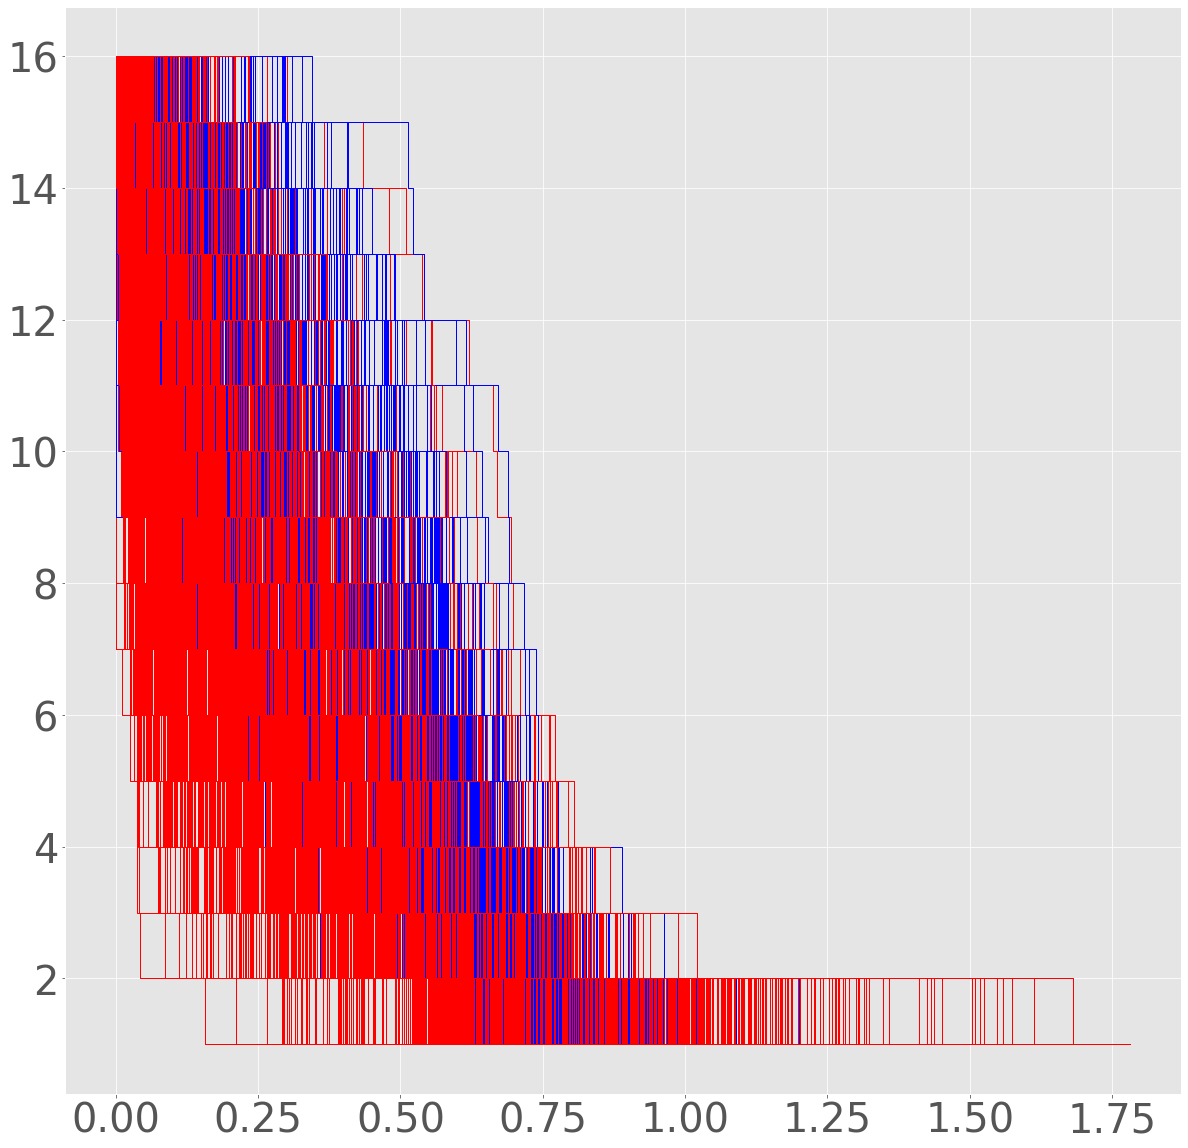

In [6]:
# specifying metric
metric = "correlation"
metric_parameter = 2

# specifying clustering method
clustering_method = "single"
cloudsize = 16    #(x,y,likelihood)*8
dimsize = 100
pcf_full_test3 = []
y_test3 = []

plt.figure(figsize=(20,20))


for e in range(len(data_test3)):
    pos = dimsize*e
    if len(data_test3) - pos <  dimsize:
        break
    
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_test3.iloc[pos:pos+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_test3[data_test3.columns[i+offset]][pos+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    try:
        f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
        pcf_full_test3.append(f_pcf.content)
        #test
        if n_groom>dimsize/2:
            f_pcf.plot(color='blue')
            y_test3.append(0)
        else:
            f_pcf.plot(color='red')
            y_test3.append(1)
    except:
        print("0 coordinates in trajectory")
    
    
        
    # add overlap
    pos2 = pos + int(dimsize/2)
    if len(data_test3) - pos2 <  dimsize:
        break
    # Preparing an empty array of float
    points_dummy = np.empty((cloudsize,dimsize), float)

    offset = 0
    subdata = data_test3.iloc[pos2:pos2+dimsize]
    n_groom = len(subdata[subdata["label"] == 0]) #number of grooming labels
    
    for i in range(cloudsize):
        if i%2 == 0:
            offset = offset +1
        for j in range(dimsize):
            points_dummy[i][j] = float(data_test3[data_test3.columns[i+offset]][pos2+j])

    # Create the point cloud
    points = np.vstack(points_dummy)
    point_cloud = sr.EucObject(points)

    try:
        f_pcf = point_cloud.get_h0sr(metric = metric, metric_parameter = metric_parameter, clustering_method = clustering_method)
        pcf_full_test3.append(f_pcf.content)
        #test
        if n_groom>dimsize/2:
            f_pcf.plot(color='blue')
            y_test3.append(0)
        else:
            f_pcf.plot(color='red')
            y_test3.append(1)
    except:
        print("0 coordinates in trajectory")

## SVM

In [7]:
from sklearn import svm

def srank_kernel(X, Y):
    """
    We create a custom stable rank kernel
    ref: JENS AGERBERG, Statistical Learning and Analysis on Homology-Based Features
    X,Y: stable rank array input data
    """
    t_union = np.union1d(X[0], Y[0])
    tY_diff = np.setdiff1d(Y[0], X[0]) #t in Y but not in X
    tX_diff = np.setdiff1d(X[0], Y[0]) #t in X but not in Y
    M1 = np.zeros(len(t_union))
    M2 = np.zeros(len(t_union))
    x_offset = 0
    y_offset = 0
    for i in range(len(t_union)):
        if t_union[i] <= X[0][-1] and t_union[i] == X[0][i-x_offset]:
            M1[i] = X[1][i-x_offset]
        else:
            x_offset = x_offset + 1
            M1[i] = X[1][i-x_offset]
            
        if t_union[i] <= Y[0][-1] and t_union[i] == Y[0][i-y_offset]:
            M2[i] = Y[1][i-y_offset]
        else:
            y_offset = y_offset + 1
            M2[i] = Y[1][i-y_offset]
    t_diff = np.ediff1d(t_union)
    return np.dot(np.multiply(M1[0:len(M1)-1], M2[0:len(M2)-1]), t_diff)

#this requires return a Gram matrix
def proxy_kernel(X,Y):
    gram_matrix = np.zeros((len(X), len(Y)))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            gram_matrix[i, j] = srank_kernel(x, y)
    return gram_matrix

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=proxy_kernel, class_weight='balanced')
clf.fit(pcf_full, y_train)

y_pred=clf.predict(pcf_full)
score = f1_score(y_train, y_pred, average='micro')
print(score)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))


y_test_pred=clf.predict(pcf_full_test)
score = f1_score(y_test, y_test_pred, average='micro')
print(score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

y_test_pred3=clf.predict(pcf_full_test3)
score = f1_score(y_test3, y_test_pred3, average='micro')
print(score)
print(classification_report(y_test3, y_test_pred3))
print(confusion_matrix(y_test3, y_test_pred3))

0.7513397642015005
              precision    recall  f1-score   support

           0       0.45      0.76      0.57       604
           1       0.92      0.75      0.83      2195

    accuracy                           0.75      2799
   macro avg       0.69      0.75      0.70      2799
weighted avg       0.82      0.75      0.77      2799

[[ 458  146]
 [ 550 1645]]
0.7013651877133106
              precision    recall  f1-score   support

           0       0.40      0.64      0.49       267
           1       0.87      0.72      0.79       905

    accuracy                           0.70      1172
   macro avg       0.64      0.68      0.64      1172
weighted avg       0.76      0.70      0.72      1172

[[170  97]
 [253 652]]
0.7928779069767441
              precision    recall  f1-score   support

           0       0.30      0.73      0.42       143
           1       0.96      0.80      0.87      1233

    accuracy                           0.79      1376
   macro avg       0.

## kNN

In [9]:
#subsampling
print(y_train.count(0))
print(y_train.count(1)) 

np.random.seed(1)

pos0 = [i for i, x in enumerate(y_train) if x == 0]
pos1 = [i for i, x in enumerate(y_train) if x == 1]
rand_pos = np.random.permutation(np.arange(0,len(pos1)-1))[:y_train.count(0)]
rand_pos1 = [pos1[i] for i in rand_pos]

y_train_filtered = []
pcf_full_filtered = []
for i in rand_pos1:
    y_train_filtered.append(y_train[i])
    pcf_full_filtered.append(pcf_full[i])

for i in pos0:
    y_train_filtered.append(0)
    pcf_full_filtered.append(pcf_full[i])

print(len(pcf_full_filtered))

pos0 = [i for i, x in enumerate(y_train) if x == 0]
pos1 = [i for i, x in enumerate(y_train) if x == 1]
rand_pos = np.random.permutation(np.arange(0,len(pos1)-1))[:y_train.count(0)]
rand_pos1 = [pos1[i] for i in rand_pos]

y_train_filtered = []
pcf_full_filtered = []
for i in rand_pos1:
    y_train_filtered.append(y_train[i])
    pcf_full_filtered.append(pcf_full[i])

for i in pos0:
    y_train_filtered.append(0)
    pcf_full_filtered.append(pcf_full[i])

len_train = len(pcf_full_filtered)
len_test = len(pcf_full_test)
len_test3 = len(pcf_full_test3)


pcf_all = []
for i in range(len_train):
    pcf_all.append(pcf_full_filtered[i])

for i in range(len_test):
    pcf_all.append(pcf_full_test[i])
    
for i in range(len_test3):
    pcf_all.append(pcf_full_test3[i])
    
# append all training data to the end
for i in range(len(pcf_full)):
    pcf_all.append(pcf_full[i])
    
print(len(pcf_all))

list_pcf = []
list_pcf_test = []
list_pcf_test3 = []
list_pcf_training = []

for i in range(len_train):
    list_pcf.append([i])
    
for i in range(len_train, len_train + len_test):
    list_pcf_test.append([i])
    
for i in range(len_train + len_test, len_train + len_test + len_test3):
    list_pcf_test3.append([i])
    
for i in range(len_train + len_test + len_test3, len(pcf_all)):
    list_pcf_training.append([i])

604
2195
1208
6555


In [10]:
from sklearn.neighbors import KNeighborsClassifier

def interleavingDist(X,Y):
    x_pcf = sr.Pcnif(pcf_all[int(X)])
    y_pcf = sr.Pcnif(pcf_all[int(Y)])
    d = x_pcf.interleaving_distance(y_pcf)
    return d

neigh = KNeighborsClassifier(n_neighbors=9, metric=interleavingDist)
neigh.fit(list_pcf, y_train_filtered)

KNeighborsClassifier(metric=<function interleavingDist at 0x7ff28d2c51f0>,
                     n_neighbors=9)

In [11]:

y_train_pred=neigh.predict(list_pcf_training)
score = f1_score(y_train, y_train_pred,average='micro')
print('Train Neighbour')
print(score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

y_test_pred=neigh.predict(list_pcf_test)
score = f1_score(y_test, y_test_pred,average='micro')
print('Validation Neighbour')
print(score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

y_test_pred3=neigh.predict(list_pcf_test3)
score = f1_score(y_test3, y_test_pred3,average='micro')
print('Test same angle Neighbour')
print(score)
print(classification_report(y_test3, y_test_pred3))
print(confusion_matrix(y_test3, y_test_pred3))

Train Neighbour
0.781707752768846
              precision    recall  f1-score   support

           0       0.50      0.82      0.62       604
           1       0.94      0.77      0.85      2195

    accuracy                           0.78      2799
   macro avg       0.72      0.80      0.73      2799
weighted avg       0.85      0.78      0.80      2799

[[ 498  106]
 [ 505 1690]]
Validation Neighbour
0.7039249146757679
              precision    recall  f1-score   support

           0       0.41      0.64      0.50       267
           1       0.87      0.72      0.79       905

    accuracy                           0.70      1172
   macro avg       0.64      0.68      0.64      1172
weighted avg       0.77      0.70      0.72      1172

[[172  95]
 [252 653]]
Test same angle Neighbour
0.8204941860465116
              precision    recall  f1-score   support

           0       0.33      0.71      0.45       143
           1       0.96      0.83      0.89      1233

    accuracy 